In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [16]:
file_path = 'Global-Refugee-Dataset-1951-2015csv/Global-Refugee-Dataset-1951-2015.csv'  

data = pd.read_csv(file_path)

data

C:\Users\moham\AppData\Local\Temp\ipykernel_29348\2564407927.py:3: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...
107954,2015,Zimbabwe,Syrian Arab Rep.,0,0,0,0.0,0.0,0,5,5
107955,2015,Zimbabwe,Uganda,8,0,0,0.0,0.0,0,*,8
107956,2015,Zimbabwe,Stateless,0,0,0,0.0,0.0,300000,0,300000
107957,2015,Zimbabwe,South Africa,*,0,0,0.0,0.0,0,5,5


Number of nodes: 223
Number of edges: 9940


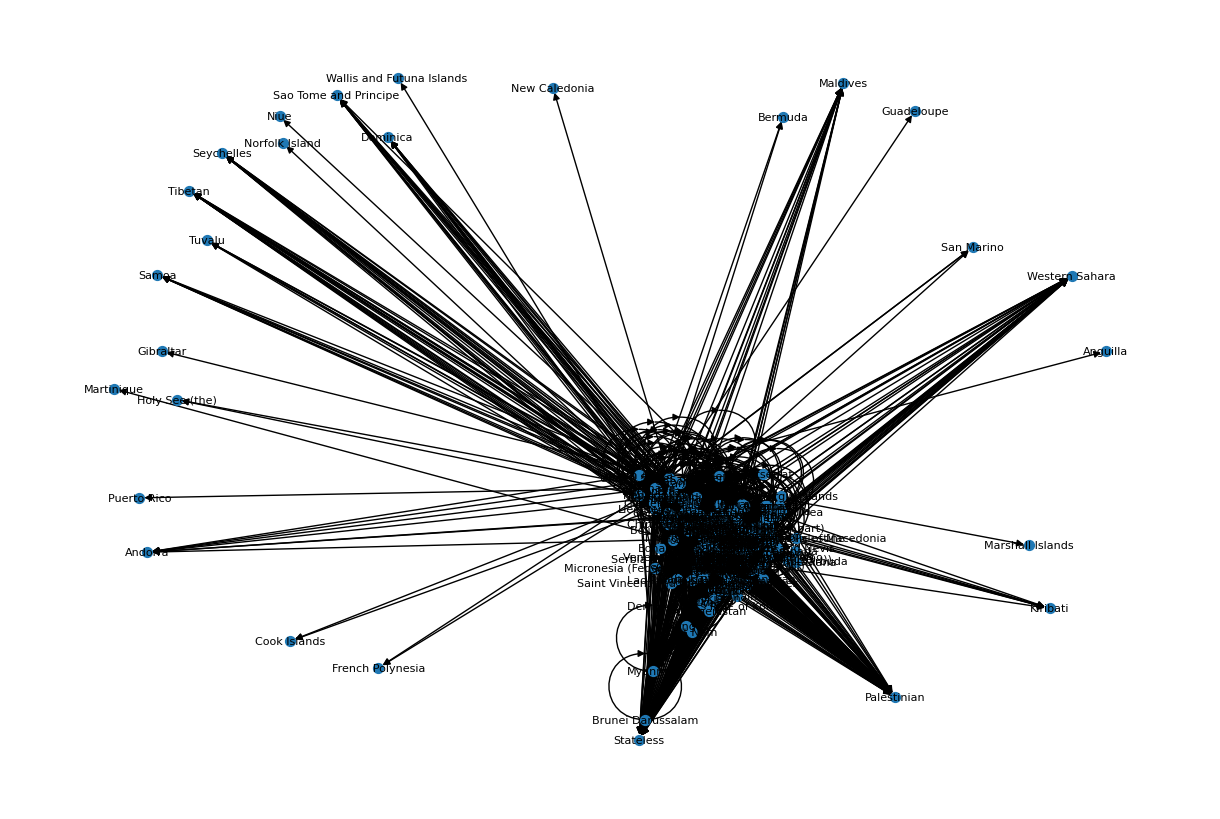

In [18]:
edge_list = data[['Country / territory of asylum/residence', 'Origin']]

# Drop rows with missing values in the edge columns
edge_list = edge_list.dropna()

# Rename columns for clarity (Source and Target for graph)
edge_list.columns = ['Source', 'Target']

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(edge_list, source='Source', target='Target', create_using=nx.DiGraph())

# Analyze the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Optional: Draw the graph (simple visualization)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()

In [37]:
import pandas as pd
import networkx as nx
import random

# Load the dataset
file_path = "Global-Refugee-Dataset-1951-2015csv/Global-Refugee-Dataset-1951-2015.csv"
df = pd.read_csv(file_path)

# Filter out rows with missing Source or Target
df = df.dropna(subset=["Country / territory of asylum/residence", "Origin"])

# Clean node names: remove trailing/leading spaces and special characters
def clean_node_name(name):
    return name.strip()

# Create the graph
G = nx.DiGraph()

# Generate a random color for each node
def generate_random_color():
    return f'#{random.randint(0, 0xFFFFFF):06x}'

# Dictionary to store node colors
node_colors = {}

# Add nodes with labels and colors
for _, row in df.iterrows():
    asylum_country = clean_node_name(row["Country / territory of asylum/residence"])
    origin_country = clean_node_name(row["Origin"])
    total_population = row["Total Population"]

    # Ensure total_population is a float; default to 1 if missing or invalid
    try:
        weight = float(total_population)
    except (ValueError, TypeError):
        weight = 1.0

    # Add nodes with labels and assign random colors
    if asylum_country not in node_colors:
        node_colors[asylum_country] = generate_random_color()
    if origin_country not in node_colors:
        node_colors[origin_country] = generate_random_color()

    G.add_node(asylum_country, label=asylum_country, color=node_colors[asylum_country])
    G.add_node(origin_country, label=origin_country, color=node_colors[origin_country])

    # Add an edge between the origin and asylum country
    G.add_edge(origin_country, asylum_country, weight=weight)

# Assign colors and opacity to nodes in GEXF format
for node, data in G.nodes(data=True):
    color_hex = node_colors[node]
    # Convert hex color to RGB
    r = int(color_hex[1:3], 16)
    g = int(color_hex[3:5], 16)
    b = int(color_hex[5:7], 16)
    # Add color attributes
    data['viz'] = {
        'color': {'r': r, 'g': g, 'b': b, 'a': 0.6},  # Reduced alpha for transparency
        'size': 10  # Larger size for better visibility
    }

# Add edge attributes for better visibility
for source, target, data in G.edges(data=True):
    data['weight'] = data.get('weight', 1.0)  # Default weight to 1.0 if missing
    data['viz'] = {
        'color': {'r': 100, 'g': 100, 'b': 100, 'a': 0.8},  # Gray with slight transparency
        'thickness': 2  # Thicker edges for visibility
    }

# Export to GEXF format
output_file = "global_refugee_network_cleaned.gexf"
nx.write_gexf(G, output_file)

print(f"GEXF file with cleaned node names created: {output_file}")


C:\Users\moham\AppData\Local\Temp\ipykernel_29348\551614355.py:7: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


GEXF file with cleaned node names created: global_refugee_network_cleaned.gexf


In [ ]:
G = nx.from_pandas_edgelist(data, create_using=nx.DiGraph())

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [19]:
largest_wcc = max(nx.weakly_connected_components(G), key=len)
G_wcc = G.subgraph(largest_wcc)
print("Nodes in largest WCC:", G_wcc.number_of_nodes())
print("Edges in largest WCC:", G_wcc.number_of_edges())

largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc)
print("Nodes in largest SCC:", G_scc.number_of_nodes())
print("Edges in largest SCC:", G_scc.number_of_edges())

Nodes in largest WCC: 223
Edges in largest WCC: 9940
Nodes in largest SCC: 190
Edges in largest SCC: 9475


In [20]:
avg_clustering = nx.average_clustering(G.to_undirected())
print("Average clustering coefficient:", avg_clustering)

triangles = sum(nx.triangles(G.to_undirected()).values()) // 3
print("Number of triangles:", triangles)

Average clustering coefficient: 0.7306427006219385
Number of triangles: 206163


In [21]:
try:
    diameter = nx.diameter(G_wcc)
    print("Diameter (longest shortest path):", diameter)
except nx.NetworkXError:
    print("Diameter calculation not possible.")



Diameter calculation not possible.


In [ ]:
def effective_diameter(G, percentile=0.9):
    lengths = dict(nx.shortest_path_length(G))
    all_lengths = [length for target_dict in lengths.values() for length in target_dict.values()]
    return pd.Series(all_lengths).quantile(percentile)

effective_diam = effective_diameter(G_wcc)
print("90-percentile effective diameter:", effective_diam)

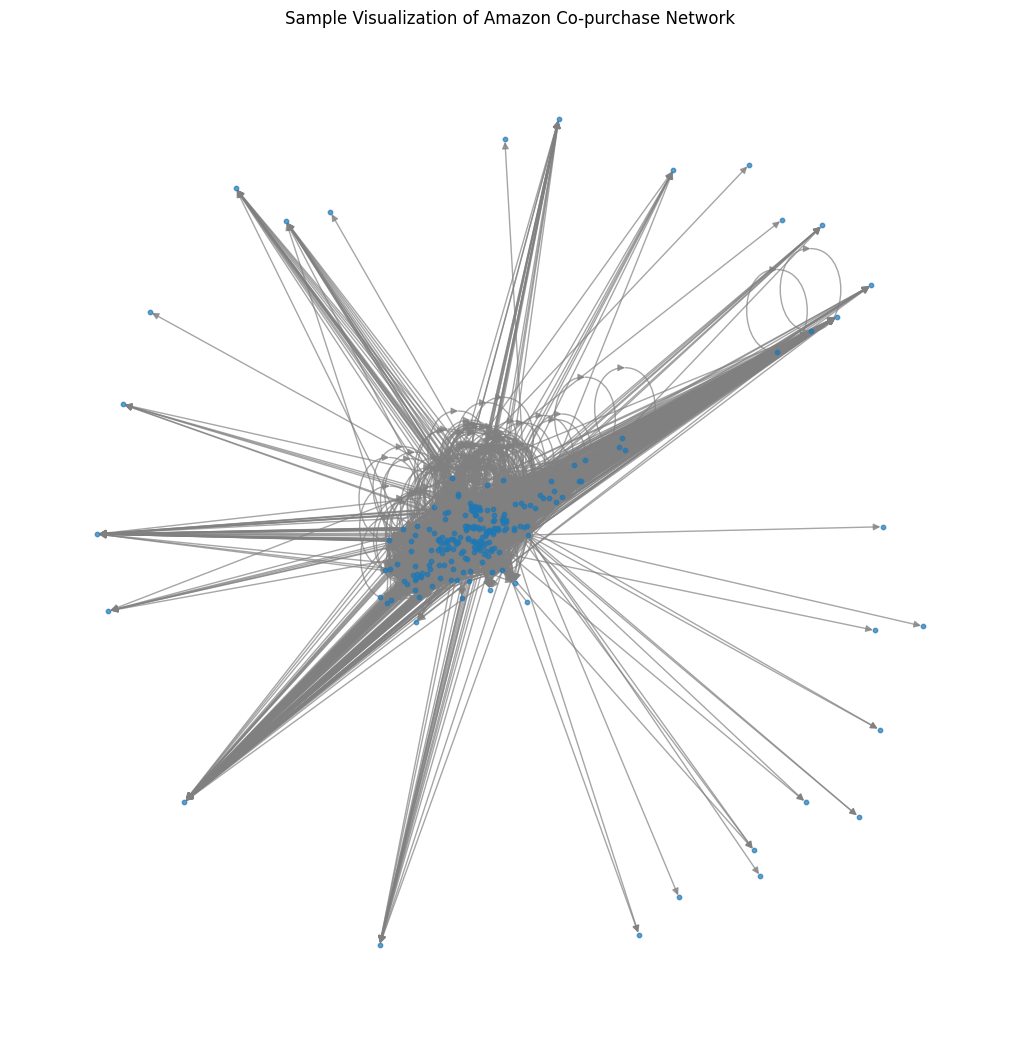

In [22]:
import matplotlib.pyplot as plt

sample_nodes = list(G.nodes)[:500]
subgraph = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 10))
nx.draw(subgraph, node_size=10, edge_color='gray', alpha=0.7, with_labels=False)
plt.title("Sample Visualization of Amazon Co-purchase Network")
plt.show()


In [ ]:
import json
stats = {
    "Number of nodes": num_nodes,
    "Number of edges": num_edges,
    "Nodes in largest WCC": G_wcc.number_of_nodes(),
    "Edges in largest WCC": G_wcc.number_of_edges(),
    "Nodes in largest SCC": G_scc.number_of_nodes(),
    "Edges in largest SCC": G_scc.number_of_edges(),
    "Average clustering coefficient": avg_clustering,
    "Number of triangles": triangles,
    "Diameter": diameter if 'diameter' in locals() else "Not calculated",
}

with open("network_stats.json", "w") as f:
    json.dump(stats, f, indent=4)

print("Network statistics saved to network_stats.json")

Network statistics saved to network_stats.json


In [ ]:
import pandas as pd

file_path = 'amazon/Amazon0302.txt'  
edges = []

with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:  
            source, target = parts
            edges.append((source, target))

df = pd.DataFrame(edges, columns=['Source', 'Target'])
df.to_csv('edges.csv', index=False)


In [ ]:
import networkx as nx

file_path = 'amazon/Amazon0302.txt'  
output_file = 'amazon_graph.gexf'   

G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2: 
            source, target = parts
            G.add_edge(source, target)

nx.write_gexf(G, output_file)

print(f"GEXF file successfully created: {output_file}")


GEXF file successfully created: amazon_graph.gexf


# Donald Trump

Number of nodes: 303
Number of edges: 366

Top 5 nodes by Degree Centrality:
Donald J. Trump: 0.6060
Jared Kushner: 0.0629
Ivanka Trump: 0.0430
Mike Pence: 0.0430
Donald Trump Jr.: 0.0364


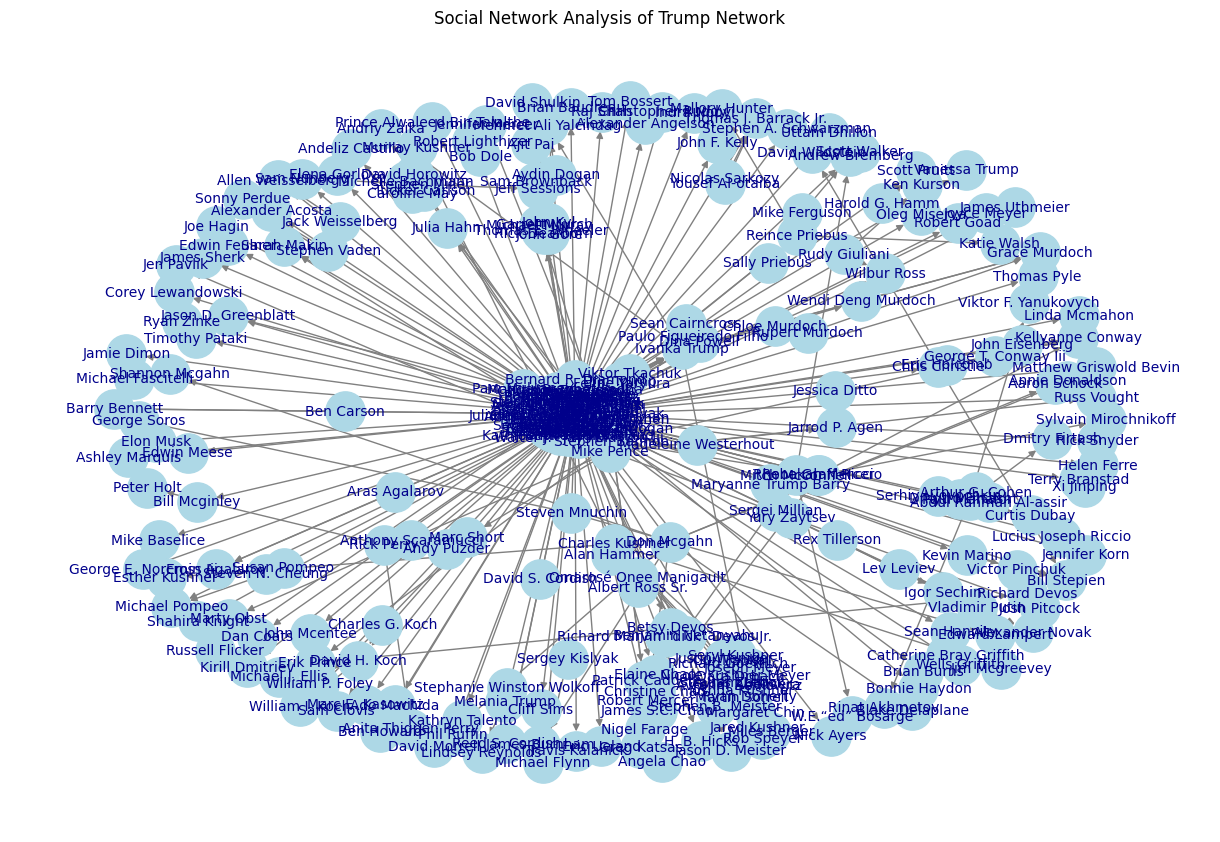

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

edges_file = 'data/trump-edges.csv'  
nodes_file = 'data/trump-nodes.csv'  

edges = pd.read_csv(edges_file)
nodes = pd.read_csv(nodes_file)

G = nx.DiGraph()

for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'])

for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], relationship=row['Relationship'], citation=row['Citation'])

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by Degree Centrality:")
for node, centrality in top_degree_centrality:
    print(f"{node}: {centrality:.4f}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  
nx.draw(
    G, pos, with_labels=True, 
    node_size=800, node_color='lightblue', 
    font_size=10, font_color='darkblue', edge_color='gray'
)
plt.title("Social Network Analysis of Trump Network")
plt.show()


In [25]:
edges_file = 'data/trump-edges.csv'  
nodes_file = 'data/trump-nodes.csv'  

edges = pd.read_csv(edges_file)
nodes = pd.read_csv(nodes_file)

G = nx.DiGraph()

for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'])

for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], relationship=row['Relationship'], citation=row['Citation'])

output_file = 'trump-network.gexf'
nx.write_gexf(G, output_file)

print(f"Graph successfully exported to {output_file}")

Graph successfully exported to trump-network.gexf


In [ ]:
import pandas as pd
import networkx as nx
import random

edges_file = 'data/trump-edges.csv' 
nodes_file = 'data/trump-nodes.csv'  

edges = pd.read_csv(edges_file)
nodes = pd.read_csv(nodes_file)

G = nx.DiGraph()

for index, row in nodes.iterrows():
    color = {
        'r': random.randint(0, 255),
        'g': random.randint(0, 255),
        'b': random.randint(0, 255),
        'a': 1.0  
    }
    G.add_node(row['Id'], label=row['Label'], viz={'color': color})

for index, row in edges.iterrows():
    G.add_edge(
        row['Source'],
        row['Target'],
        weight=row['Weight'],
        relationship=row['Relationship'],
        citation=row['Citation']
    )

output_file = 'trump-network-colored-names.gexf'
nx.write_gexf(G, output_file)

print(f"Graph successfully exported to {output_file}")


Graph successfully exported to trump-network-colored-names.gexf


In [ ]:
import pandas as pd
import networkx as nx
import random

file_path = "Data_Loyalty_NonLoyalty/Data_Loyalty_NonLoyalty.csv"  
df = pd.read_csv(file_path)

def clean_name(name):
    if pd.isna(name):
        return "Unknown"
    return str(name).strip()

G = nx.DiGraph()

def generate_random_color():
    return f'#{random.randint(0, 0xFFFFFF):06x}'

node_colors = {}

for _, row in df.iterrows():
    customer_id = clean_name(row['customer_id'])
    store_city = clean_name(row['store_city'])
    transaction_id = clean_name(row['transactionId'])
    total_spend = row['total_spend'] if not pd.isna(row['total_spend']) else 0

    weight = total_spend if total_spend > 0 else 1

    if customer_id not in node_colors:
        node_colors[customer_id] = generate_random_color()
    if store_city not in node_colors:
        node_colors[store_city] = generate_random_color()

    G.add_node(customer_id, label=customer_id, color=node_colors[customer_id])
    G.add_node(store_city, label=store_city, color=node_colors[store_city])

    G.add_edge(customer_id, store_city, transaction_id=transaction_id, weight=weight)


for node, data in G.nodes(data=True):
    color_hex = node_colors[node]
    r = int(color_hex[1:3], 16)
    g = int(color_hex[3:5], 16)
    b = int(color_hex[5:7], 16)
    data['viz'] = {
        'color': {'r': r, 'g': g, 'b': b, 'a': 0.8},  # Add some transparency
        'size': 15  # Set a default node size
    }


for source, target, data in G.edges(data=True):
    data['viz'] = {
        'color': {'r': 100, 'g': 100, 'b': 100, 'a': 0.5},  # Gray with transparency
        'thickness': 2  # Thicker edges for better visibility
    }


output_file = "customer_store_network_fixed.gexf"
nx.write_gexf(G, output_file)

print(f"GEXF file created: {output_file}")


C:\Users\moham\AppData\Local\Temp\ipykernel_29348\2393108642.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


GEXF file created: customer_store_network_fixed.gexf
